In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('corn_data.csv')
data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Corn,PHILIPPINES,Average,5430,1377,4008,10815,13554,8124,6747,2739,0.25,5.65,1915,7.08,81285572,2.08
1,2002,Corn,PHILIPPINES,Dry,5255,1355,4535,11145,14096,8841,7486,2951,0.26,5.59,1994,7.07,81285572,2.08
2,2002,Corn,PHILIPPINES,Wet,5594,1398,3516,10508,13046,7452,6054,2538,0.24,5.7,1842,7.08,81285572,2.08
3,2003,Corn,PHILIPPINES,Average,5827,1317,4602,11746,12907,7080,5763,1161,0.1,6.13,1915,6.74,82942837,2.04
4,2003,Corn,PHILIPPINES,Dry,5487,1306,4961,11754,14254,8767,7461,2500,0.21,5.43,2163,6.59,82942837,2.04


## Population Data

## Merge Data

## Data Pre-processing

In [3]:
# Check for missing values in the merged dataset
data.isnull().sum()

Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [4]:
data.dtypes

Year                                       int64
Type                                      object
Geolocation                               object
Season                                    object
CASH COSTS                                object
NON-CASH COSTS                            object
IMPUTED COSTS                             object
TOTAL COSTS                               object
GROSS RETURNS                             object
RETURNS ABOVE CASH COSTS                  object
RETURNS ABOVE CASH AND NON-CASH COSTS     object
NET RETURNS                               object
NET PROFIT-COST RATIO                     object
Cost per kilogram (pesos)                 object
Yield per hectare (kg)                    object
Farmgate price (pesos/kg)                 object
Population                                 int64
Annual % Change                          float64
dtype: object

In [5]:
# Convert object columns to numeric, forcing errors to NaN (in case of any non-numeric values)
columns_to_convert = ['Year', 'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                      'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                      'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                      'Farmgate price (pesos/kg)']

# Convert the columns to numeric, forcing errors='coerce' to handle any invalid parsing
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [6]:
data.isnull().sum()

Year                                      0
Type                                      0
Geolocation                               0
Season                                    0
CASH COSTS                               26
NON-CASH COSTS                           26
IMPUTED COSTS                            26
TOTAL COSTS                              26
GROSS RETURNS                            26
RETURNS ABOVE CASH COSTS                 26
RETURNS ABOVE CASH AND NON-CASH COSTS    26
NET RETURNS                              26
NET PROFIT-COST RATIO                    26
Cost per kilogram (pesos)                26
Yield per hectare (kg)                   26
Farmgate price (pesos/kg)                27
Population                                0
Annual % Change                           0
dtype: int64

In [7]:
data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Corn,PHILIPPINES,Average,5430.0,1377.0,4008.0,10815.0,13554.0,8124.0,6747.0,2739.0,0.25,5.65,1915.0,7.08,81285572,2.08
1,2002,Corn,PHILIPPINES,Dry,5255.0,1355.0,4535.0,11145.0,14096.0,8841.0,7486.0,2951.0,0.26,5.59,1994.0,7.07,81285572,2.08
2,2002,Corn,PHILIPPINES,Wet,5594.0,1398.0,3516.0,10508.0,13046.0,7452.0,6054.0,2538.0,0.24,5.70,1842.0,7.08,81285572,2.08
3,2003,Corn,PHILIPPINES,Average,5827.0,1317.0,4602.0,11746.0,12907.0,7080.0,5763.0,1161.0,0.10,6.13,1915.0,6.74,82942837,2.04
4,2003,Corn,PHILIPPINES,Dry,5487.0,1306.0,4961.0,11754.0,14254.0,8767.0,7461.0,2500.0,0.21,5.43,2163.0,6.59,82942837,2.04


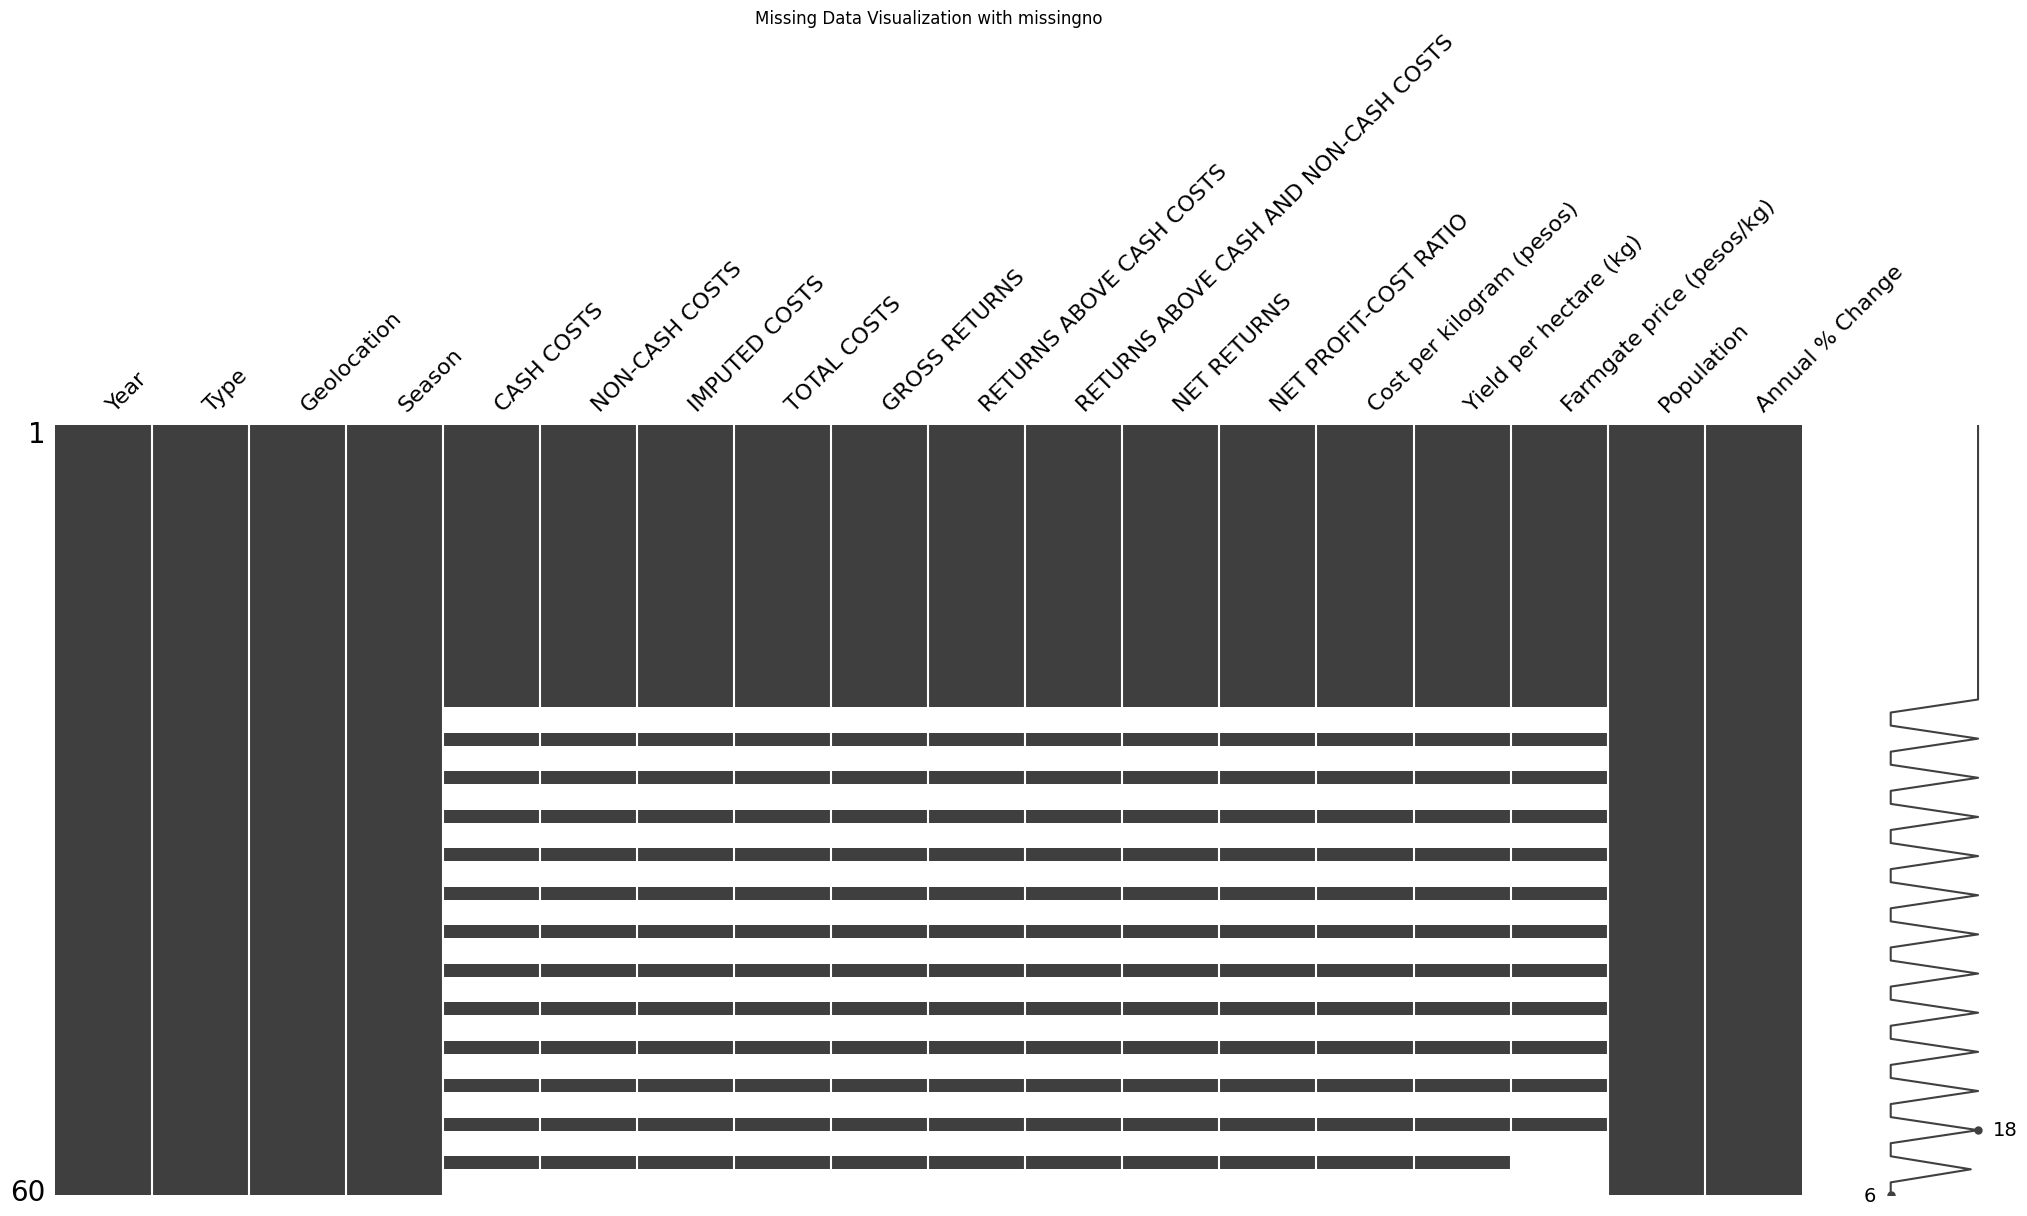

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data using missingno
msno.matrix(data)
plt.title('Missing Data Visualization with missingno')
plt.show()

In [9]:
# Impute the specified columns using median imputation first
columns_to_impute_median = ['Year', 'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                            'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                            'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                            'Farmgate price (pesos/kg)']

# Apply median imputation
data[columns_to_impute_median] = data[columns_to_impute_median].fillna(data[columns_to_impute_median].median())

# Now check how many missing values remain
data.isnull().sum()


Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [10]:
import seaborn as sns

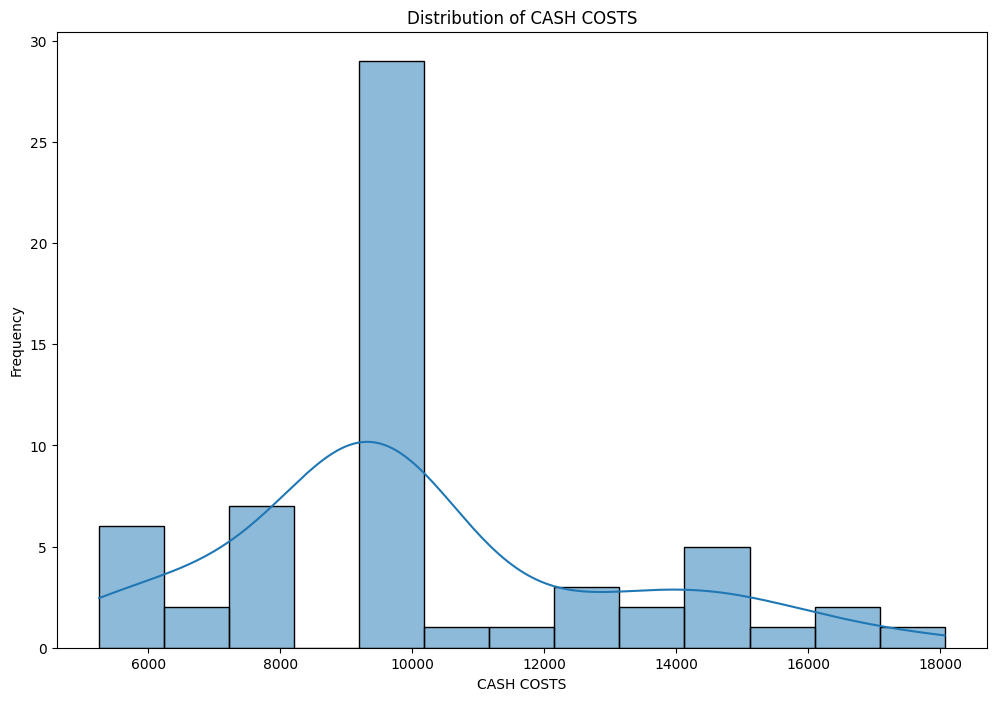

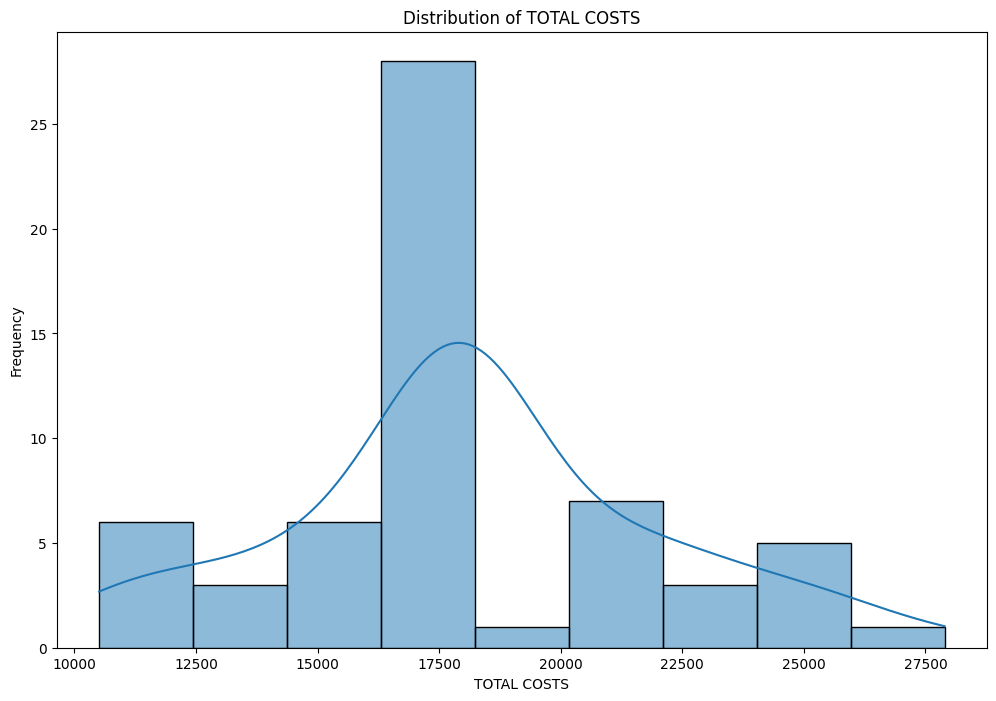

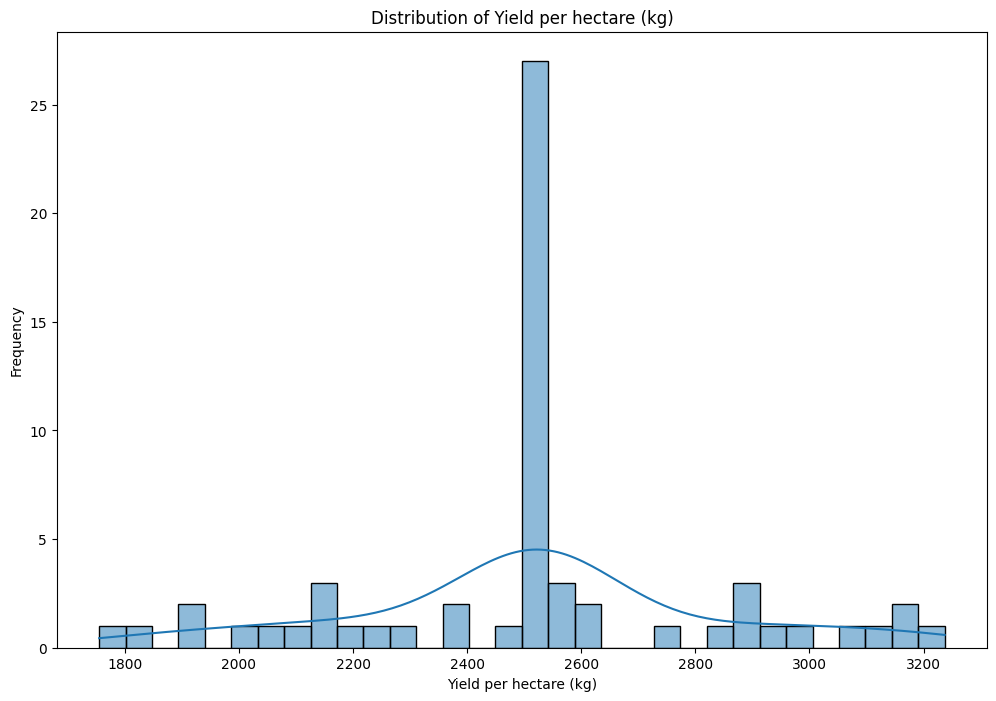

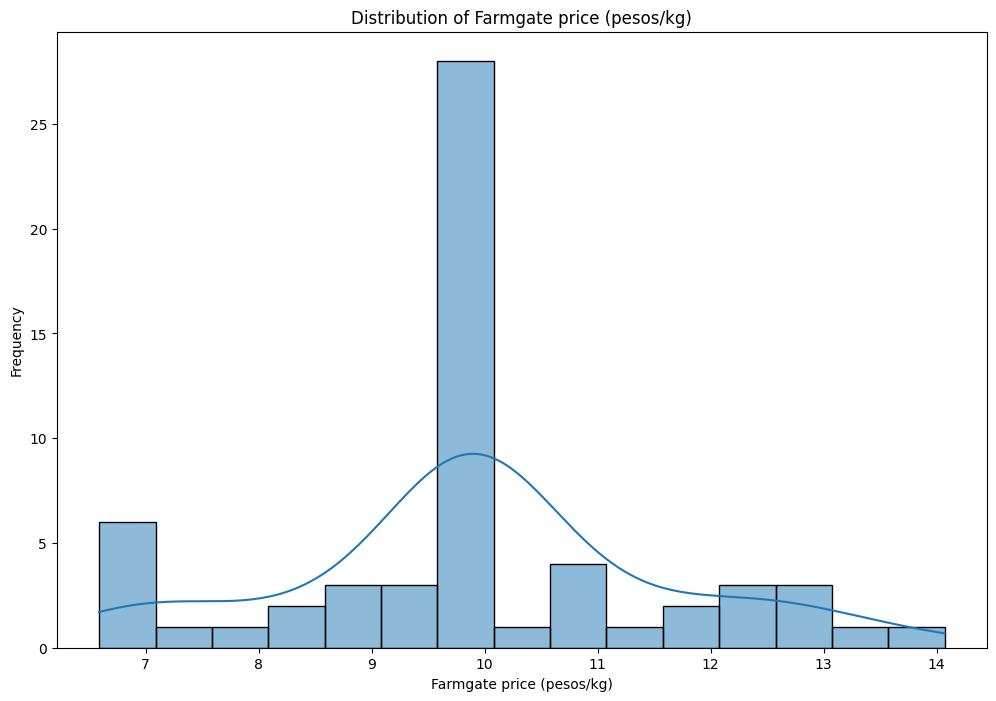

In [11]:
# Plot distribution of key numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data['CASH COSTS'], kde=True)
plt.title('Distribution of CASH COSTS')
plt.xlabel('CASH COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['TOTAL COSTS'], kde=True)
plt.title('Distribution of TOTAL COSTS')
plt.xlabel('TOTAL COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Yield per hectare (kg)'], kde=True)
plt.title('Distribution of Yield per hectare (kg)')
plt.xlabel('Yield per hectare (kg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Farmgate price (pesos/kg)'], kde=True)
plt.title('Distribution of Farmgate price (pesos/kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Frequency')
plt.show()

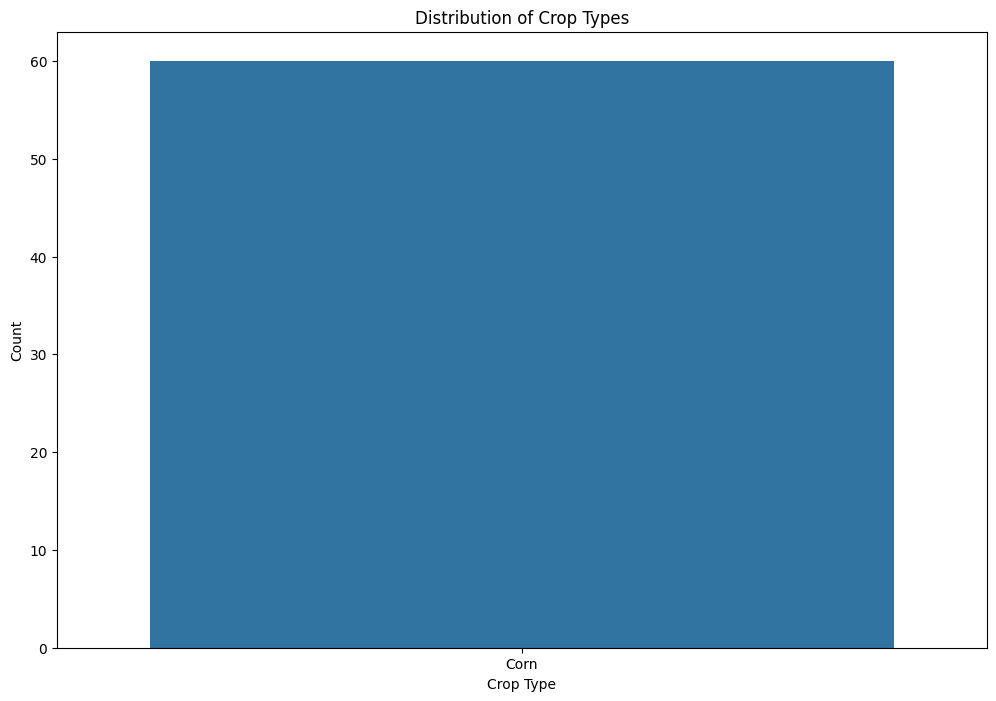

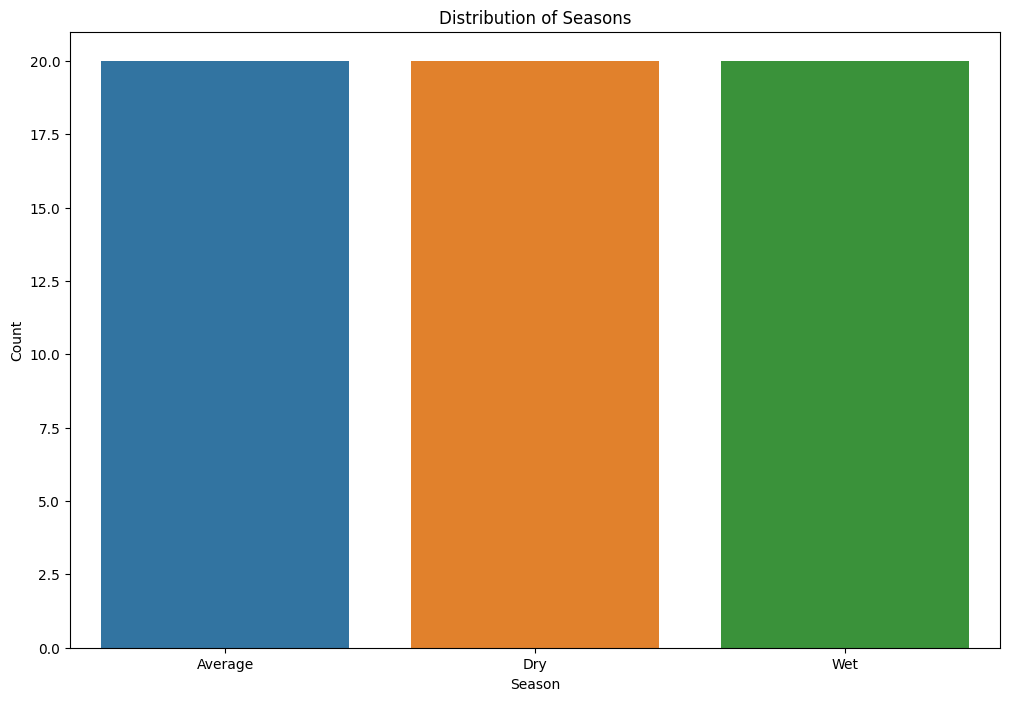

In [12]:
# Plot categorical variable 'Type'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Type')
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

# Plot categorical variable 'Season'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

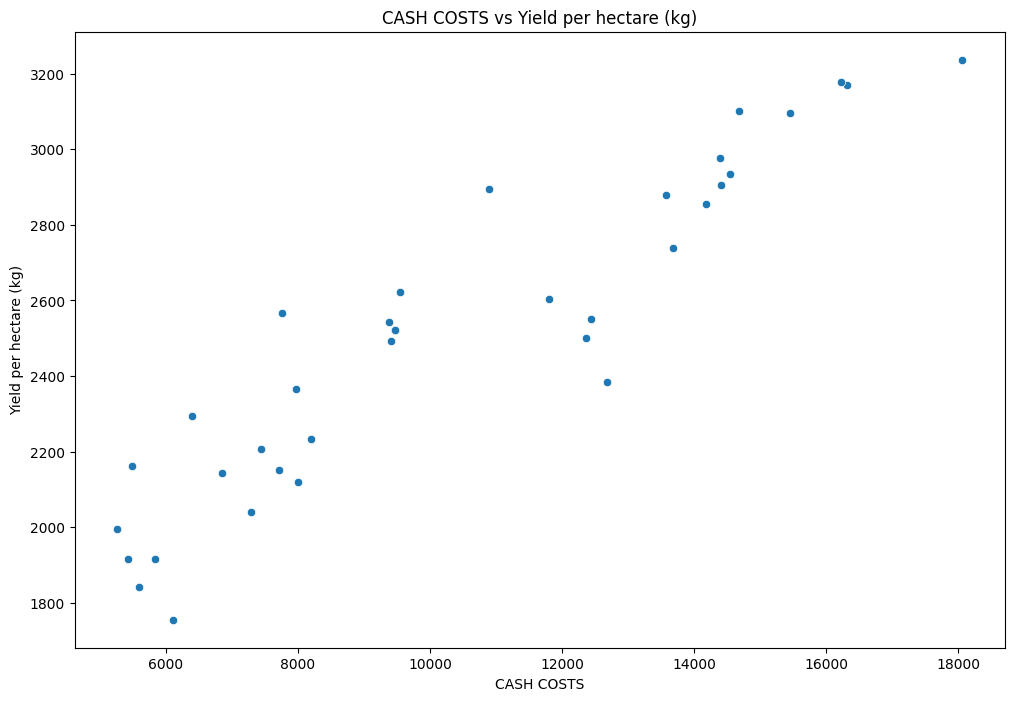

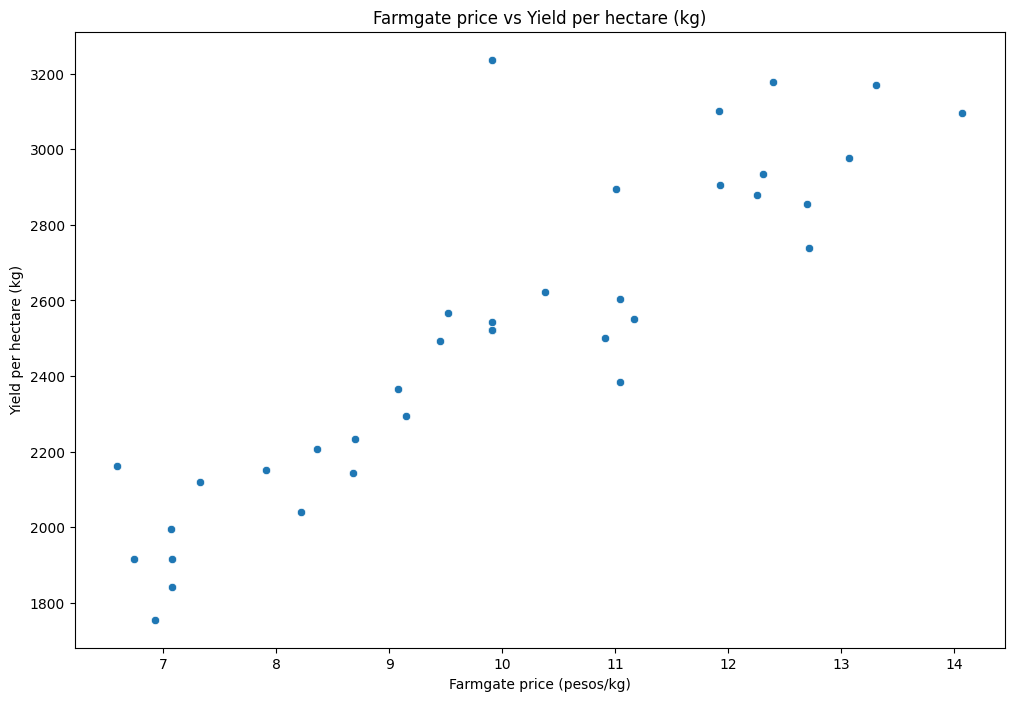

In [13]:
# Scatterplot: CASH COSTS vs Yield per hectare (kg)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CASH COSTS', y='Yield per hectare (kg)')
plt.title('CASH COSTS vs Yield per hectare (kg)')
plt.xlabel('CASH COSTS')
plt.ylabel('Yield per hectare (kg)')
plt.show()

# Scatterplot: Farmgate price vs Yield per hectare (kg)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Farmgate price (pesos/kg)', y='Yield per hectare (kg)')
plt.title('Farmgate price vs Yield per hectare (kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Yield per hectare (kg)')
plt.show()

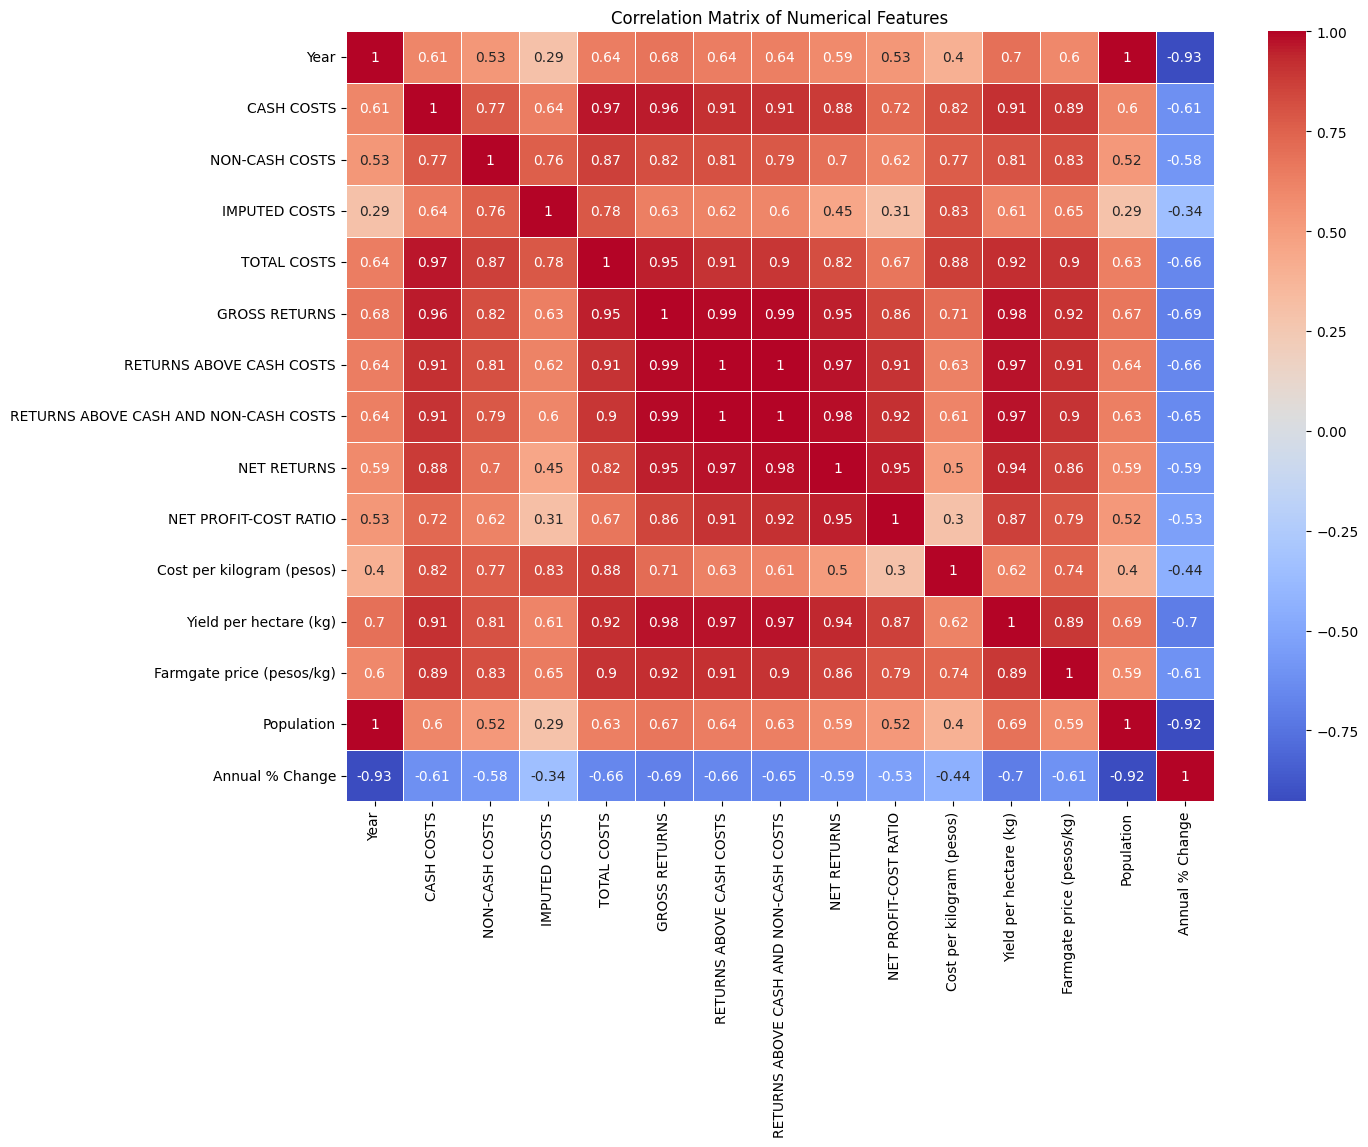

In [14]:
# Select only the numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix for the numerical features
correlation_matrix = numeric_columns.corr()

# Set up the plot for a heatmap
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

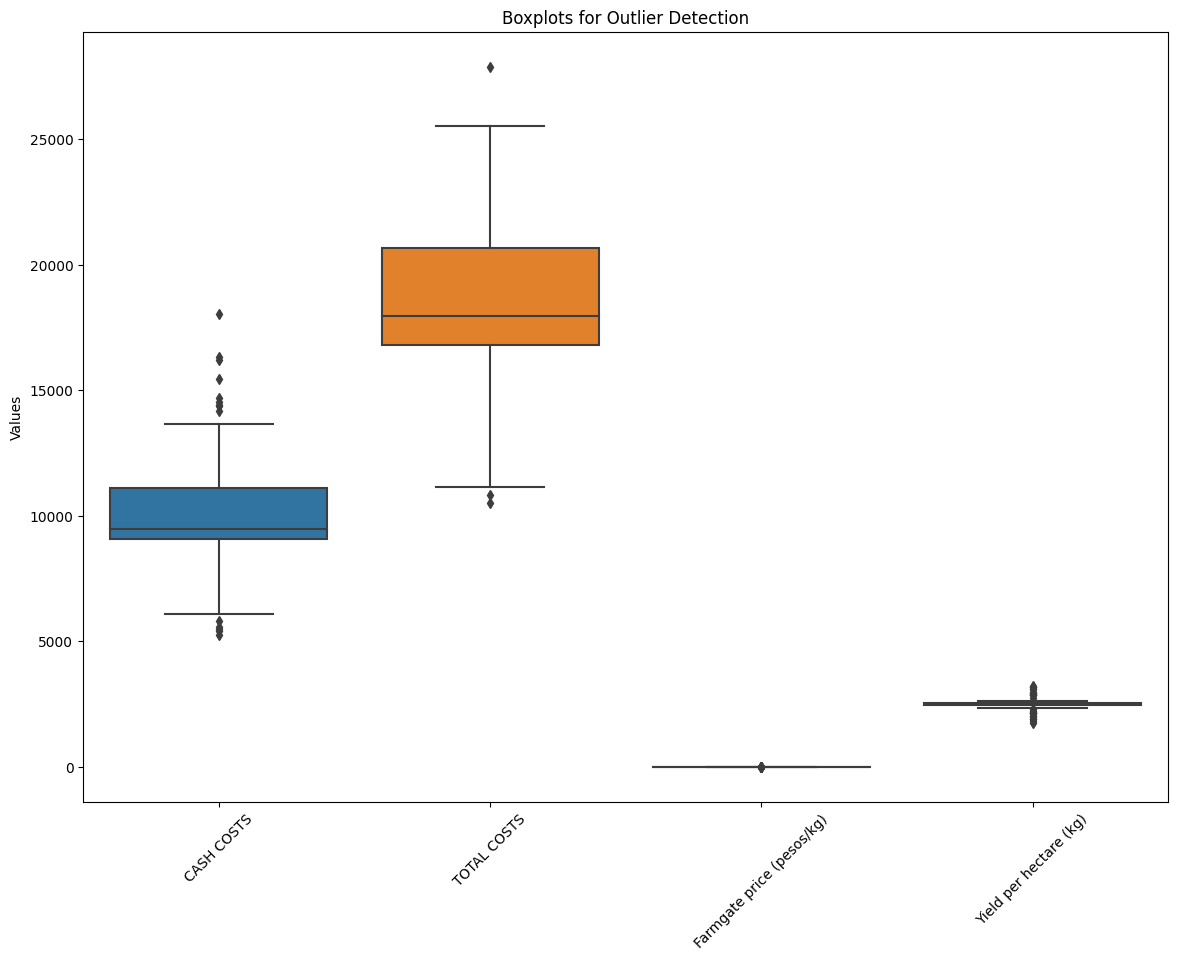

In [15]:
# Set up the figure for outlier detection using boxplots
plt.figure(figsize=(14, 10))

# Create boxplots for key numerical features to visualize outliers
sns.boxplot(data=data[['CASH COSTS', 'TOTAL COSTS', 'Farmgate price (pesos/kg)', 'Yield per hectare (kg)']])
plt.title('Boxplots for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Generate summary statistics for the numerical features
summary_statistics = data.describe()

# Display the summary statistics
summary_statistics

,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,2011.500000,10027.733333,1995.716667,5780.100000,18175.333333,26093.150000,15666.750000,13627.716667,7513.733333,0.389500,7.088333,2516.000000,9.959833,9.732290e+07,1.805500
std,5.814943,2922.223165,297.105933,957.673584,3817.020187,7572.815775,4846.273706,4611.563579,4143.255683,0.155446,0.785090,322.737588,1.651974,9.967355e+06,0.146535
min,2002.000000,5255.000000,1306.000000,3516.000000,10508.000000,12162.000000,6056.000000,4708.000000,457.000000,0.040000,5.430000,1755.000000,6.590000,8.128557e+07,1.510000
25%,2006.750000,9079.250000,2001.500000,5543.500000,16791.750000,24222.500000,14488.250000,12555.500000,5829.750000,0.367500,6.880000,2465.250000,9.502500,8.914649e+07,1.695000
50%,2011.500000,9473.500000,2016.000000,5635.500000,17983.000000,25770.500000,15377.000000,13261.000000,6855.000000,0.375000,6.960000,2522.500000,9.910000,9.718512e+07,1.795000
75%,2016.250000,11115.750000,2066.500000,5782.500000,20672.000000,27239.750000,16218.000000,14076.000000,7637.500000,0.405000,7.170000,2556.000000,10.512500,1.053411e+08,1.892500
max,2021.000000,18063.000000,2545.000000,8849.000000,27894.000000,45941.000000,28065.000000,25656.000000,19431.000000,0.810000,9.110000,3237.000000,14.070000,1.138803e+08,2.080000


In [17]:
# Function to cap outliers based on IQR
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    column_capped = column.clip(lower=lower_bound, upper=upper_bound)
    return column_capped

# Capping outliers for the selected numerical features
data['CASH COSTS'] = cap_outliers(data['CASH COSTS'])
data['TOTAL COSTS'] = cap_outliers(data['TOTAL COSTS'])
data['Farmgate price (pesos/kg)'] = cap_outliers(data['Farmgate price (pesos/kg)'])
data['Yield per hectare (kg)'] = cap_outliers(data['Yield per hectare (kg)'])

# Check the summary statistics after capping outliers to see the effect
summary_statistics_after_capping = data.describe()

# Display the summary statistics after capping
summary_statistics_after_capping

,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,2011.500000,9890.716667,1995.716667,5780.100000,18162.302083,26093.150000,15666.750000,13627.716667,7513.733333,0.389500,7.088333,2513.402083,9.969333,9.732290e+07,1.805500
std,5.814943,2489.861490,297.105933,957.673584,3739.733923,7572.815775,4846.273706,4611.563579,4143.255683,0.155446,0.785090,122.913928,1.233610,9.967355e+06,0.146535
min,2002.000000,6024.500000,1306.000000,3516.000000,10971.375000,12162.000000,6056.000000,4708.000000,457.000000,0.040000,5.430000,2329.125000,7.987500,8.128557e+07,1.510000
25%,2006.750000,9079.250000,2001.500000,5543.500000,16791.750000,24222.500000,14488.250000,12555.500000,5829.750000,0.367500,6.880000,2465.250000,9.502500,8.914649e+07,1.695000
50%,2011.500000,9473.500000,2016.000000,5635.500000,17983.000000,25770.500000,15377.000000,13261.000000,6855.000000,0.375000,6.960000,2522.500000,9.910000,9.718512e+07,1.795000
75%,2016.250000,11115.750000,2066.500000,5782.500000,20672.000000,27239.750000,16218.000000,14076.000000,7637.500000,0.405000,7.170000,2556.000000,10.512500,1.053411e+08,1.892500
max,2021.000000,14170.500000,2545.000000,8849.000000,26492.375000,45941.000000,28065.000000,25656.000000,19431.000000,0.810000,9.110000,2692.125000,12.027500,1.138803e+08,2.080000


In [18]:
from sklearn.preprocessing import LabelEncoder

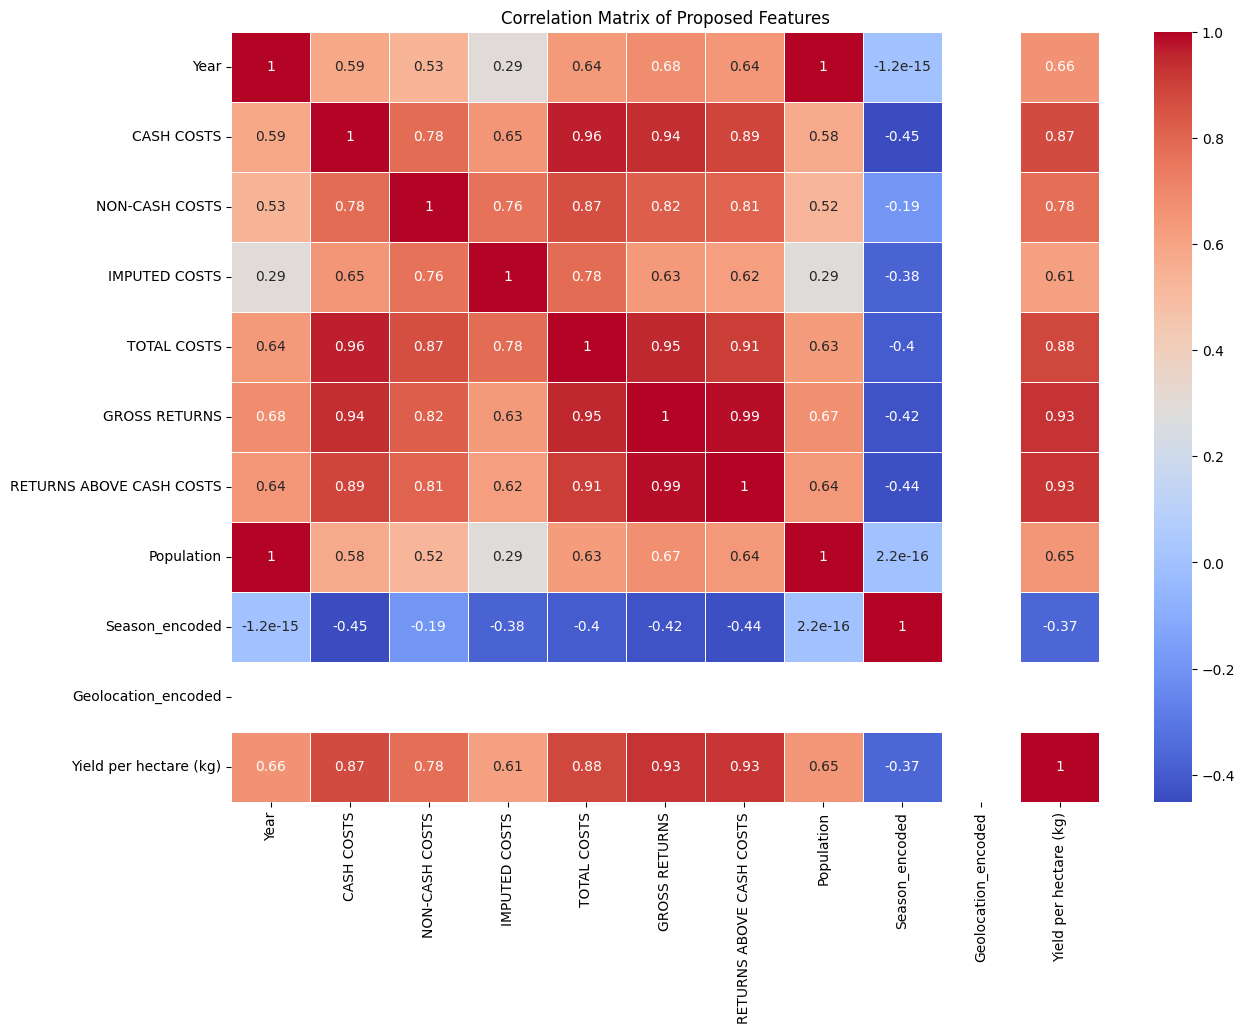

In [19]:
# Re-encode the categorical columns 'Season' and 'Geolocation' to ensure they are present
label_encoder = LabelEncoder()

# Create encoded versions of 'Season' and 'Geolocation'
data['Season_encoded'] = label_encoder.fit_transform(data['Season'])
data['Geolocation_encoded'] = label_encoder.fit_transform(data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'Year', 'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the numerical features
correlation_matrix_proposed = data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
target_variable = 'Yield per hectare (kg)'  # or 'Farmgate price (pesos/kg)' if predicting prices
features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'Year',
    'TOTAL COSTS', 'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 
    'Population', 'Season_encoded'
]



# Split the data into training and testing sets (80% training, 20% testing)
X = data[features]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48, 9), (12, 9), (48,), (12,))

## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'R-squared: {r2_rf}')


Mean Squared Error: 579.0373624999987
Mean Absolute Error: 13.095416666666628
R-squared: 0.9723667878016202


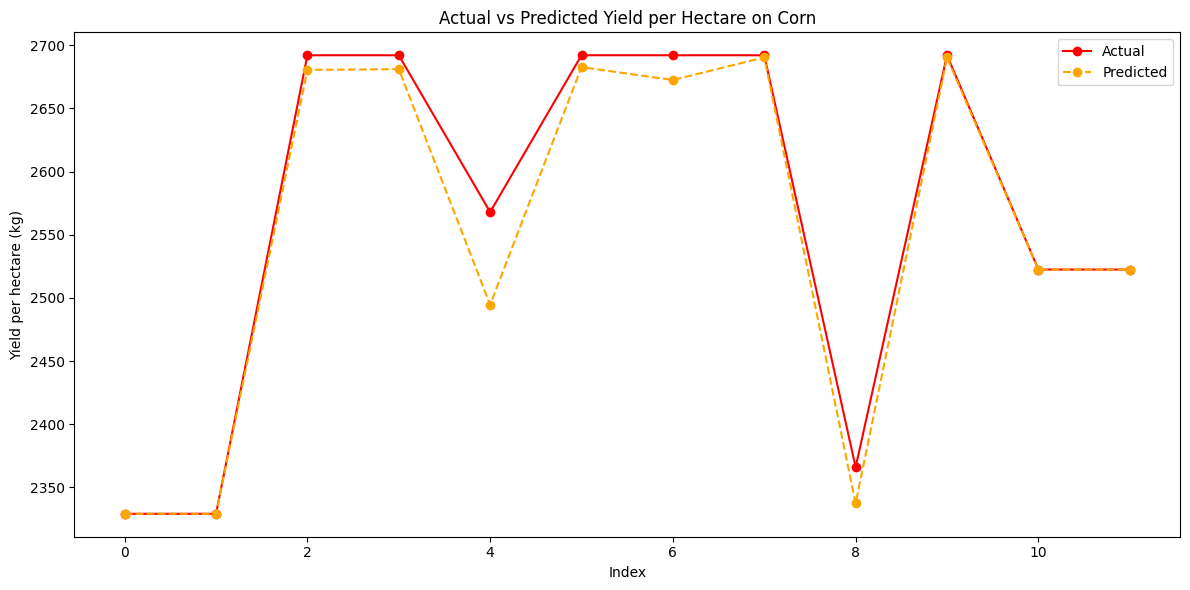

In [29]:
# Plot only the actual (test) and predicted values
plt.figure(figsize=(12, 6))

# Plot actual test data
plt.plot(range(len(y_test)), y_test, label='Actual', color='red', marker='o')

# Plot predicted values
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted', color='orange', linestyle='--', marker='o')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Yield per hectare (kg)')
plt.title('Actual vs Predicted Yield per Hectare on Corn')
plt.legend()
plt.tight_layout()
plt.show()
